In [1]:
import html
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import plotly.express as px

In [2]:
aclu_pandas = pd.read_json('aclu.json') # data from https://www.aclu.org/legislative-attacks-on-lgbtq-rights?state

regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mid-Atlantic': ['Delaware', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'South': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'West': ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
}

state_regions = {
    state: region
    for region, states in regions.items()
    for state in states
}

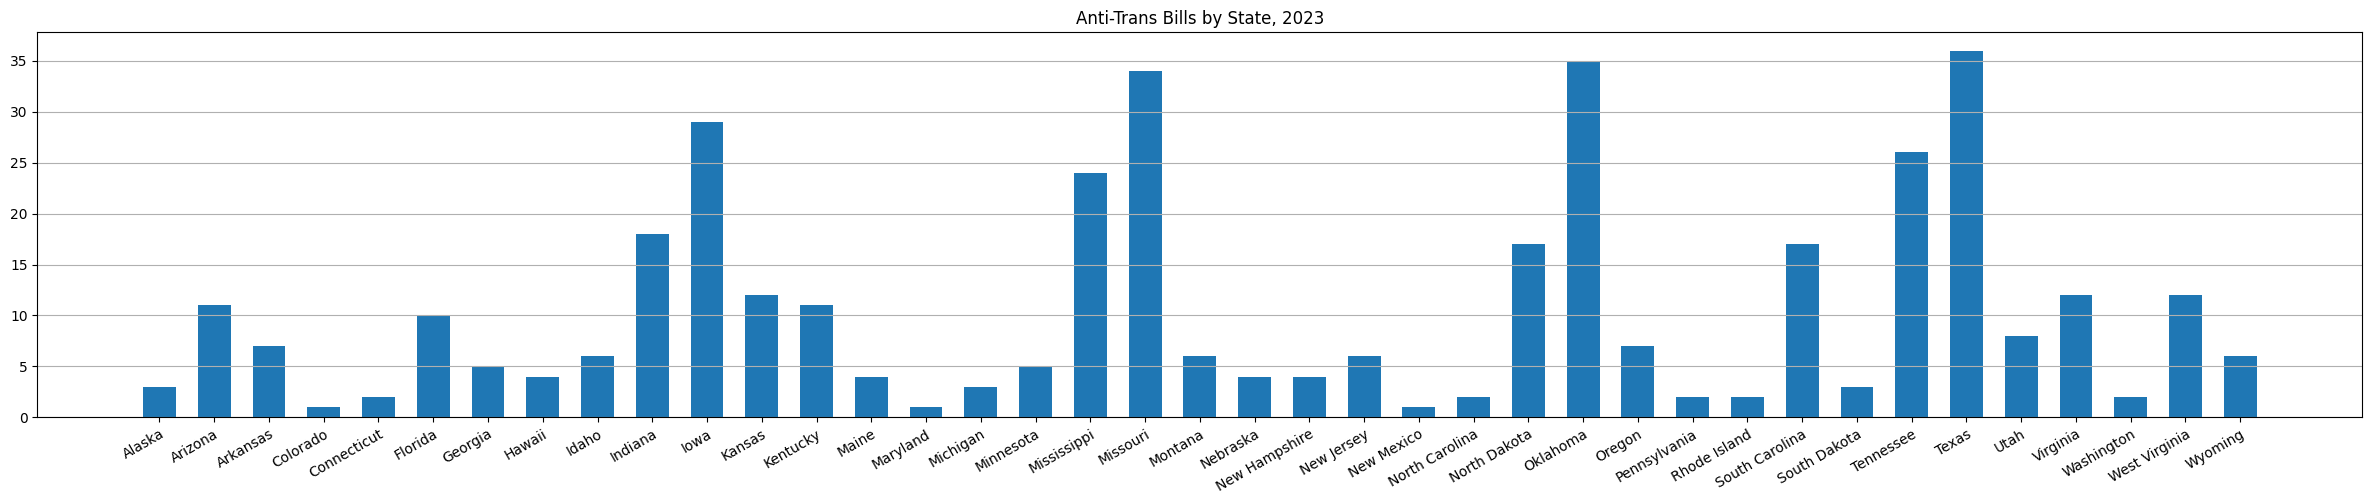

In [3]:
data = (
    aclu_pandas
        .copy()
        ['state'].transform(lambda x: x['label'])
        .value_counts()
        .sort_index()
)

y_pos = np.arange(len(data))
plt.figure(figsize=(30,5))
plt.xticks(y_pos, data.index, rotation=30, ha="right", rotation_mode="anchor")
plt.grid(True, which='major', axis='y')
plt.bar(y_pos, data, align='center', width=0.6)
plt.title('Anti-Trans Bills by State, 2023')
plt.show()

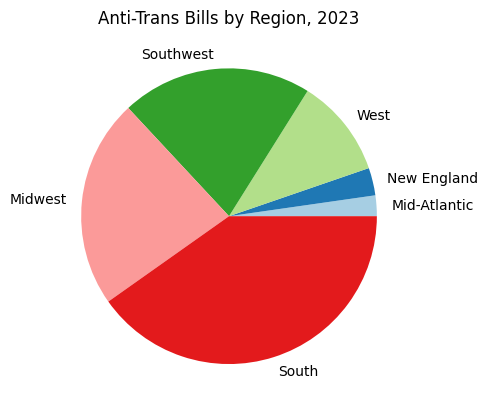

In [4]:
data = (
    aclu_pandas
        .copy()
        ['state'].transform(lambda x: state_regions[x['label']])
        .value_counts()
        .sort_values()
)

colors = sns.color_palette('Paired')
plt.pie(data, labels=data.index, colors=colors)
plt.title('Anti-Trans Bills by Region, 2023')
plt.show()

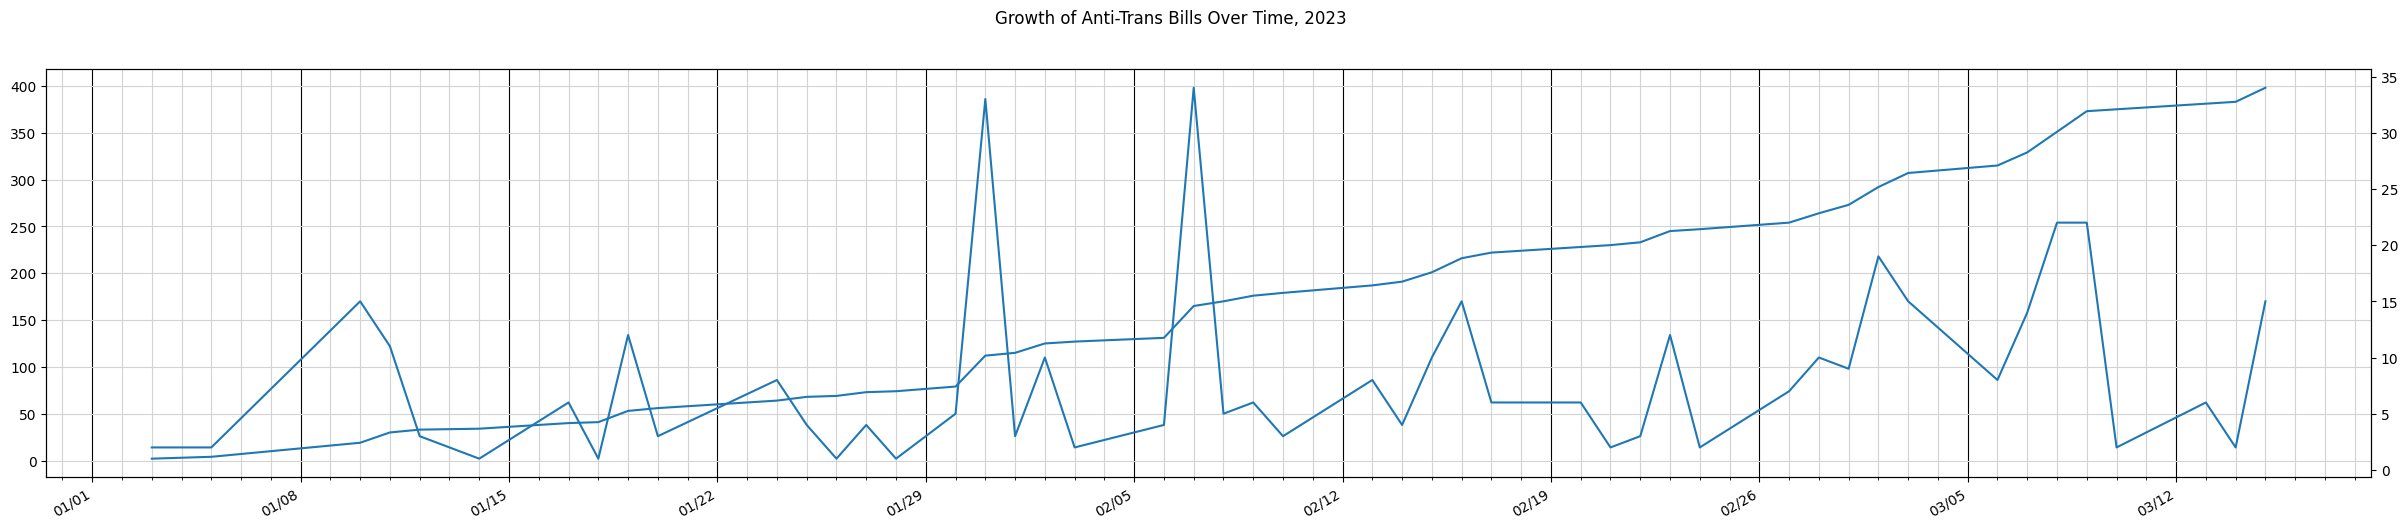

In [13]:
data = (
    aclu_pandas
        .copy()
        ['status_date'].transform(lambda x: datetime.strptime(x, '%m/%d/%Y').date())
        .value_counts()
        .sort_index()
        #.cumsum()
)

data2 = data.cumsum()

fig, ax = plt.subplots(1, 1, figsize=(30, 6))
fig.suptitle('Growth of Anti-Trans Bills Over Time, 2023')

week_locator = mdates.WeekdayLocator(byweekday=6,interval=1)
day_locator = mdates.DayLocator(interval=1)
week_formatter = mdates.DateFormatter("%m/%d")
day_formatter = mdates.DateFormatter("%a")
ax.xaxis.set_major_locator(week_locator)
ax.xaxis.set_minor_locator(day_locator)
ax.xaxis.set_major_formatter(week_formatter)
ax.grid(True, which='major', axis='x', color='black')
ax.grid(True, which='minor', axis='x', color='lightgray')
ax.grid(True, which='major', axis='y', color='lightgray')
ax2=ax.twinx()
ax2.plot(data)
ax.plot(data2)
fig.autofmt_xdate(rotation=30)

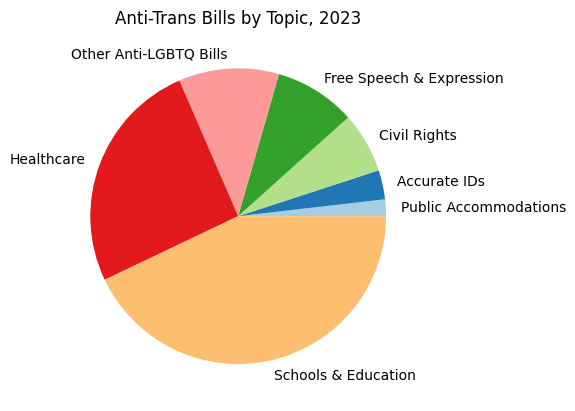

In [6]:
data = (
    aclu_pandas
        .copy()
        .explode('impact')
        ['impact'].transform(lambda x: x['label'])
        .value_counts()
        .sort_values()
)

colors = sns.color_palette('Paired')
plt.pie(data, labels=[html.unescape(label) for label in data.index], colors=colors)
plt.title('Anti-Trans Bills by Topic, 2023')
plt.show()

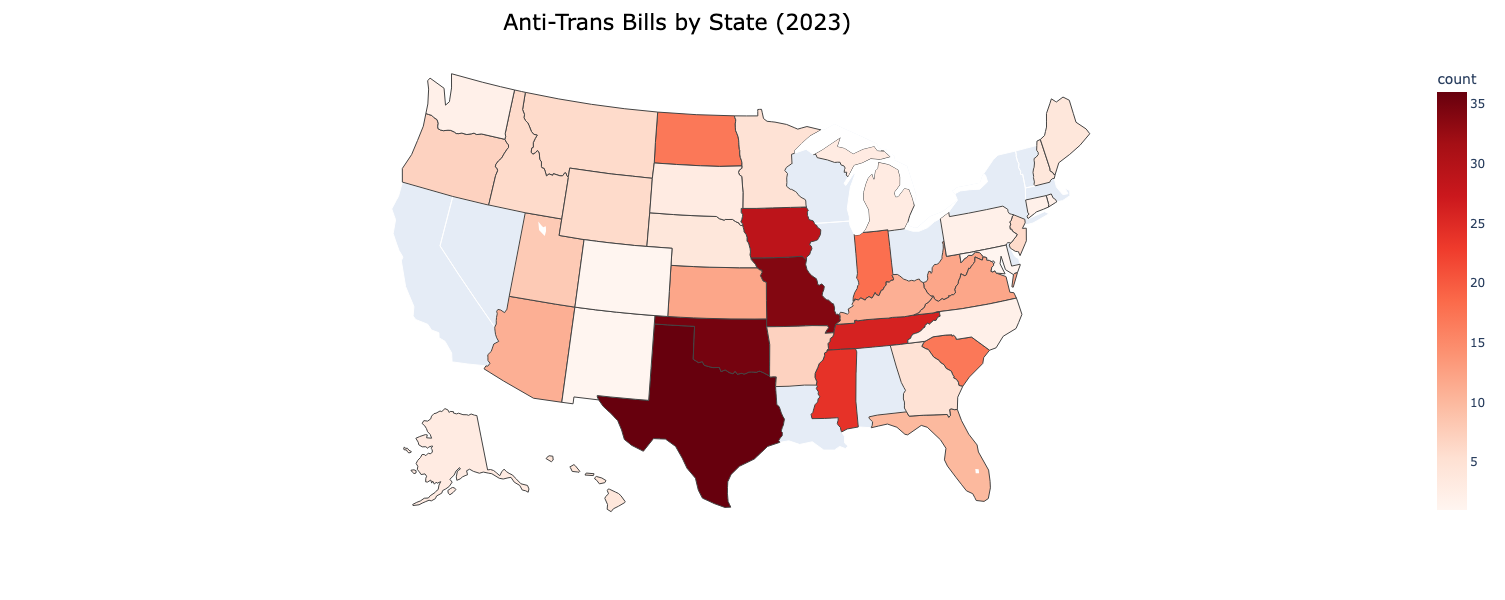

In [11]:
data = (
    aclu_pandas
        .copy()
        ['state'].transform(lambda x: x['value'])
        .value_counts()
        .to_frame()
        .rename(columns={'state':'count'})
        .rename_axis('state')
        .reset_index()
)

fig = px.choropleth(
    data,
    locations='state',
    locationmode='USA-states',
    scope='usa',
    color='count',
    color_continuous_scale='reds',
)

fig.update_layout(
    height=600,
    width=1000,
    title_text = 'Anti-Trans Bills by State (2023)',
    title_font_size = 22,
    title_font_color="black", 
    title_x=0.45, 
)

fig.show()
